In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv("/content/BTC-Daily.csv")
df.head()



,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


In [ ]:
df.shape


(2651, 9)

In [ ]:
df.describe()



,unix,open,high,low,close,Volume BTC,Volume USD
count,2.651000e+03,2651.000000,2651.000000,2651.000000,2651.000000,2.651000e+03,2.651000e+03
mean,1.531613e+09,11693.189332,12038.562912,11296.539461,11709.326213,1.330041e+07,6.099369e+07
std,6.613247e+07,16272.554746,16739.237000,15718.297511,16282.908704,4.715366e+07,1.072838e+08
min,1.417133e+09,162.000000,212.840000,152.400000,162.000000,0.000000e+00,0.000000e+00
25%,1.474373e+09,654.680000,664.460000,640.050000,654.370000,5.357883e+03,9.516170e+03
50%,1.531613e+09,6408.950000,6540.000000,6312.000000,6407.770000,1.503310e+04,2.288982e+07
75%,1.588853e+09,10708.620000,10956.240000,10303.755000,10726.425000,3.435336e+06,8.018383e+07
max,1.646093e+09,67547.490000,69000.000000,66250.000000,67559.000000,7.723295e+08,1.446125e+09


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unix        2651 non-null   int64  
 1   date        2651 non-null   object 
 2   symbol      2651 non-null   object 
 3   open        2651 non-null   float64
 4   high        2651 non-null   float64
 5   low         2651 non-null   float64
 6   close       2651 non-null   float64
 7   Volume BTC  2651 non-null   float64
 8   Volume USD  2651 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 186.5+ KB


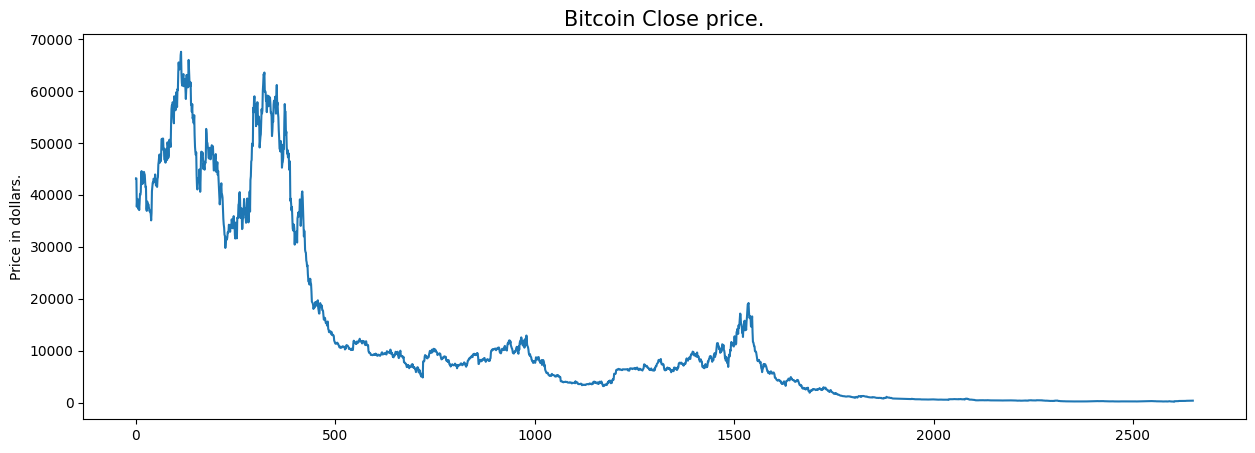

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(df['close'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()


In [ ]:
df.isnull().sum()


unix          0
date          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64

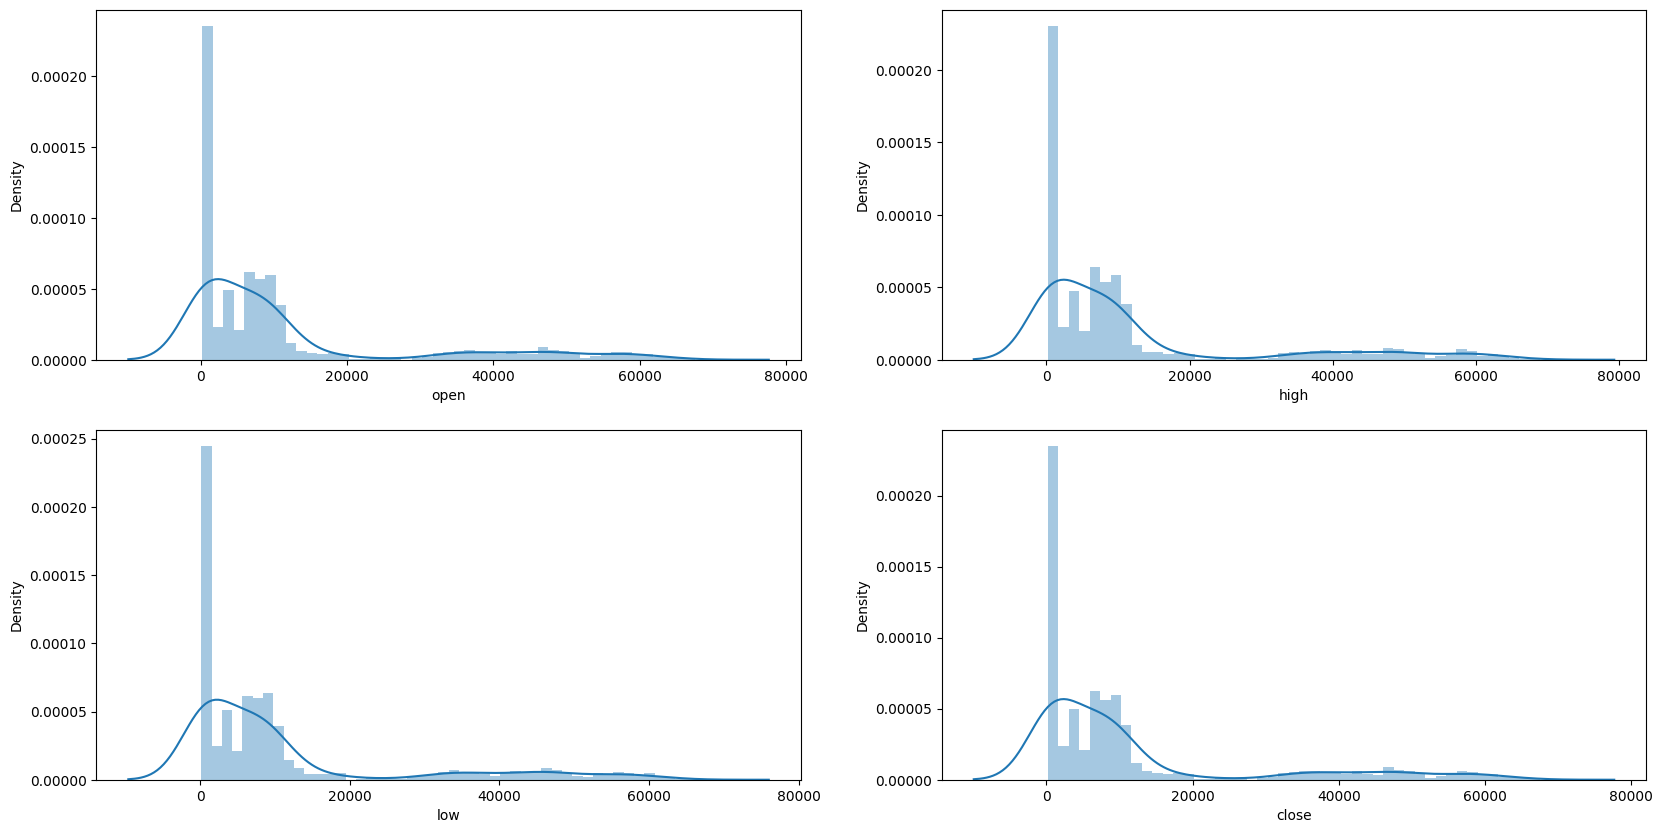

In [ ]:
features = ['open', 'high', 'low', 'close']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
 plt.subplot(2,2,i+1)
 sb.distplot(df[col])
plt.show()


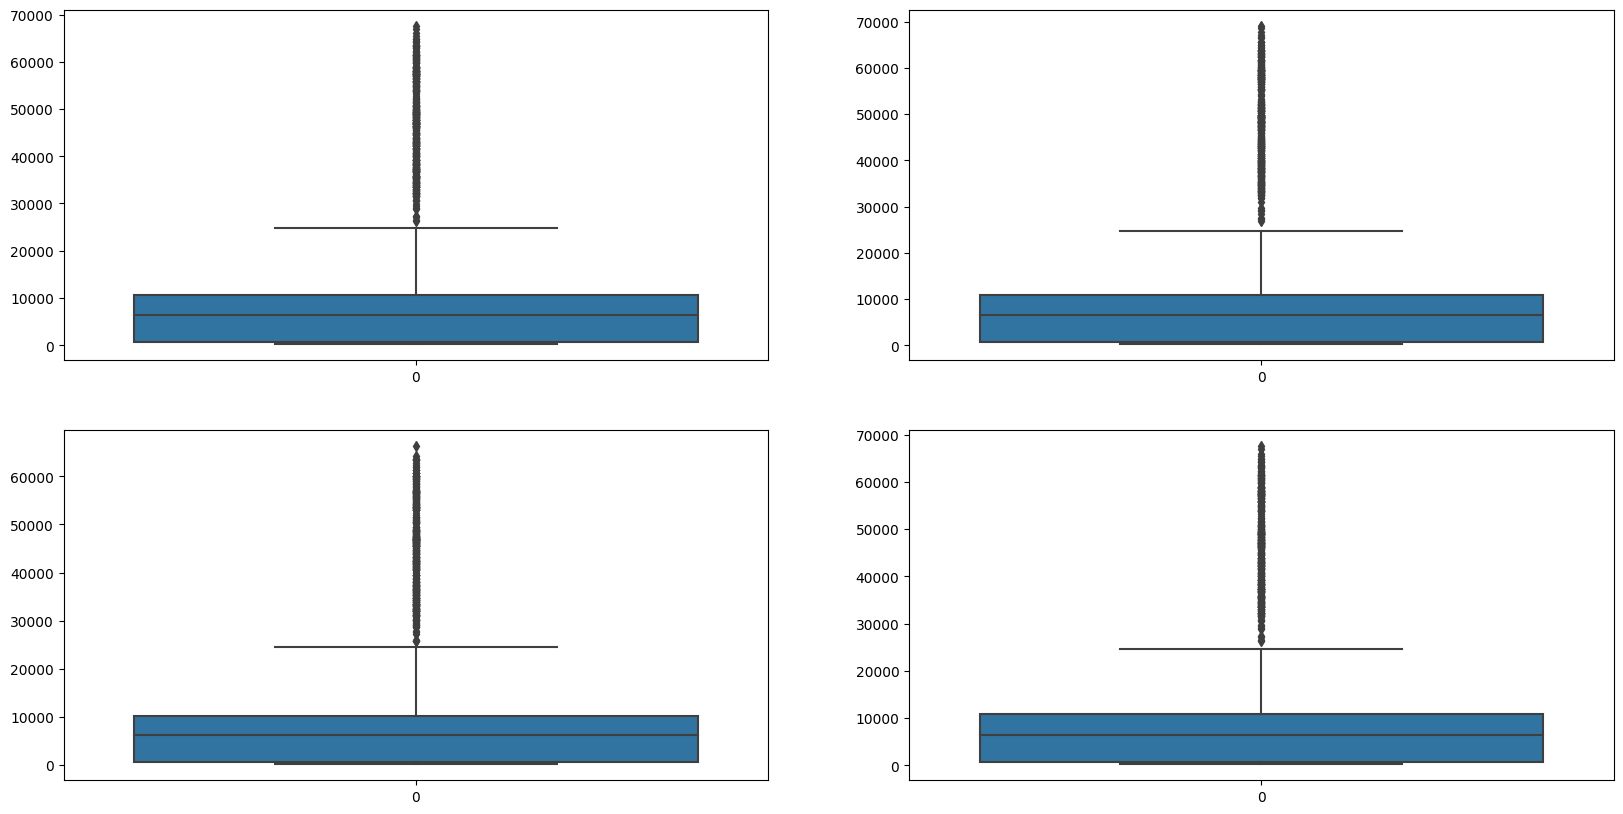

In [ ]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
 plt.subplot(2,2,i+1)
 sb.boxplot(df[col])
plt.show()


In [ ]:
df

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,4.900629e+01,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3.160618e+03,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07
...,...,...,...,...,...,...,...,...,...
2646,1417478400,2014-12-02 00:00:00,BTC/USD,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03
2647,1417392000,2014-12-01 00:00:00,BTC/USD,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
2648,1417305600,2014-11-30 00:00:00,BTC/USD,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03
2649,1417219200,2014-11-29 00:00:00,BTC/USD,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03


In [ ]:
df["date"]

0       2022-03-01 00:00:00
1       2022-02-28 00:00:00
2       2022-02-27 00:00:00
3       2022-02-26 00:00:00
4       2022-02-25 00:00:00
               ...         
2646    2014-12-02 00:00:00
2647    2014-12-01 00:00:00
2648    2014-11-30 00:00:00
2649    2014-11-29 00:00:00
2650    2014-11-28 00:00:00
Name: date, Length: 2651, dtype: object

In [ ]:
splited= df['date'].str.split(' ', expand=True)

In [ ]:
splited

,0,1
0,2022-03-01,00:00:00
1,2022-02-28,00:00:00
2,2022-02-27,00:00:00
3,2022-02-26,00:00:00
4,2022-02-25,00:00:00
...,...,...
2646,2014-12-02,00:00:00
2647,2014-12-01,00:00:00
2648,2014-11-30,00:00:00
2649,2014-11-29,00:00:00


In [ ]:
spilted1=splited[0]

In [ ]:
spilted1

0       2022-03-01
1       2022-02-28
2       2022-02-27
3       2022-02-26
4       2022-02-25
           ...    
2646    2014-12-02
2647    2014-12-01
2648    2014-11-30
2649    2014-11-29
2650    2014-11-28
Name: 0, Length: 2651, dtype: object

In [ ]:
splitted3 = spilted1.str.split('-', expand=True)

In [ ]:
splitted3

,0,1,2
0,2022,03,01
1,2022,02,28
2,2022,02,27
3,2022,02,26
4,2022,02,25
...,...,...,...
2646,2014,12,02
2647,2014,12,01
2648,2014,11,30
2649,2014,11,29


In [ ]:
df['year'] = splitted3[0].astype('int')
df['month'] = splitted3[1].astype('int')
df['day'] = splitted3[2].astype('int')

df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD,year,month,day
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06,2022,3,1
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08,2022,2,28
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07,2022,2,27
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07,2022,2,26
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07,2022,2,25


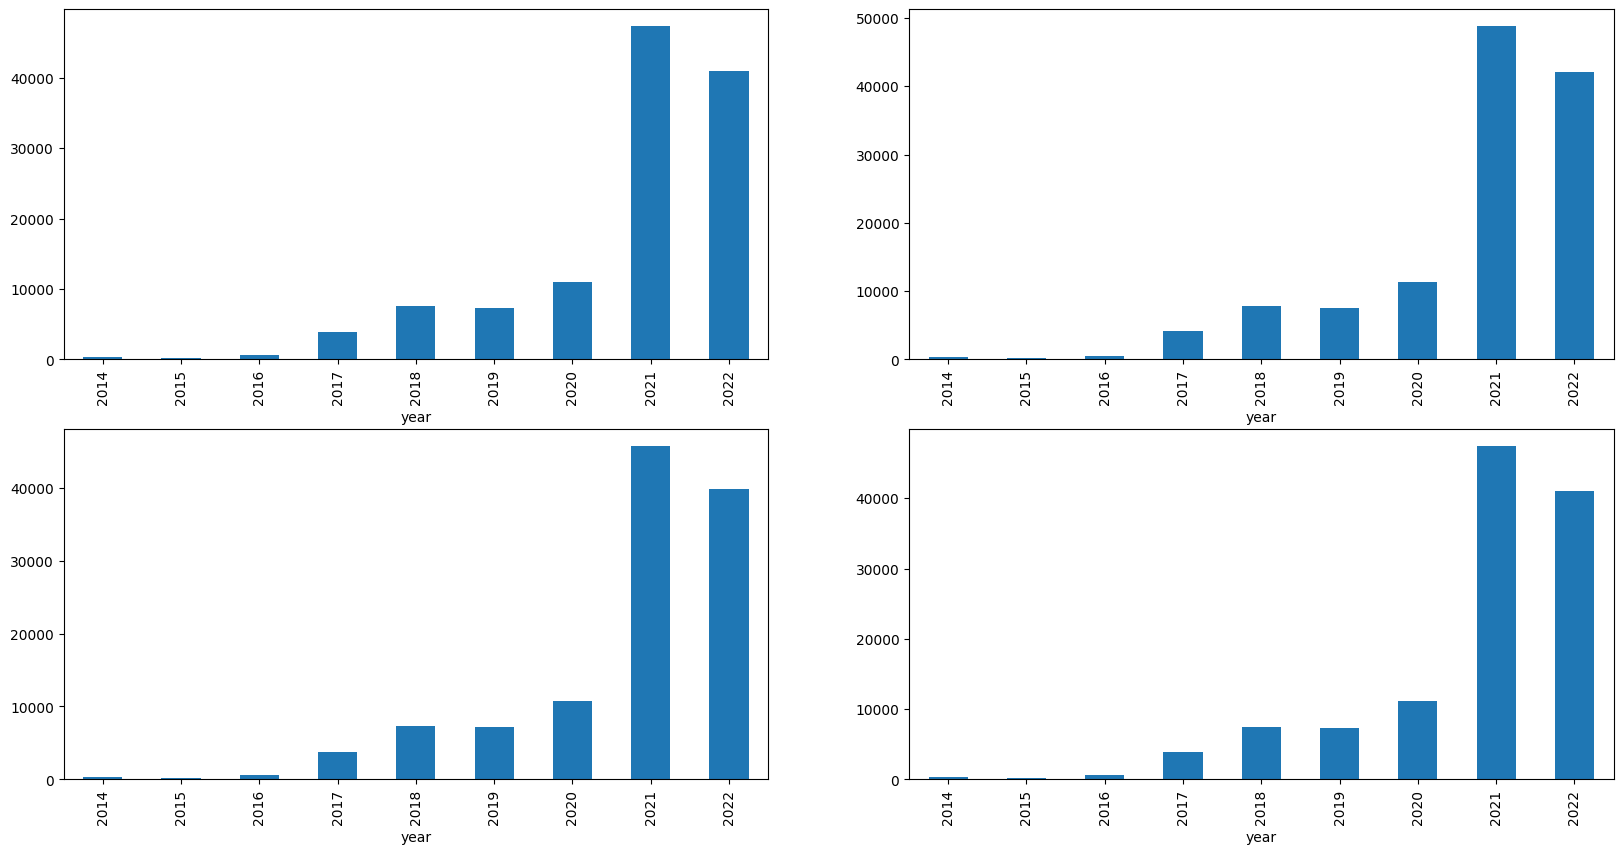

In [ ]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['open', 'high', 'low', 'close']):
 plt.subplot(2,2,i+1)
 data_grouped[col].plot.bar()
plt.show()


In [ ]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()


,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD,year,month,day,is_quarter_end
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06,2022,3,1,1
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08,2022,2,28,0
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07,2022,2,27,0
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07,2022,2,26,0
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07,2022,2,25,0


In [ ]:
df['open-close'] = df['open'] - df['close']
df['low-high'] = df['low'] - df['high']
df['target'] = np.where(df['close'].shift(-1) > df['close'], 1, 0)


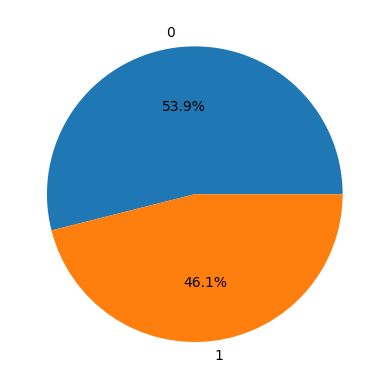

In [ ]:
plt.pie(df['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show()


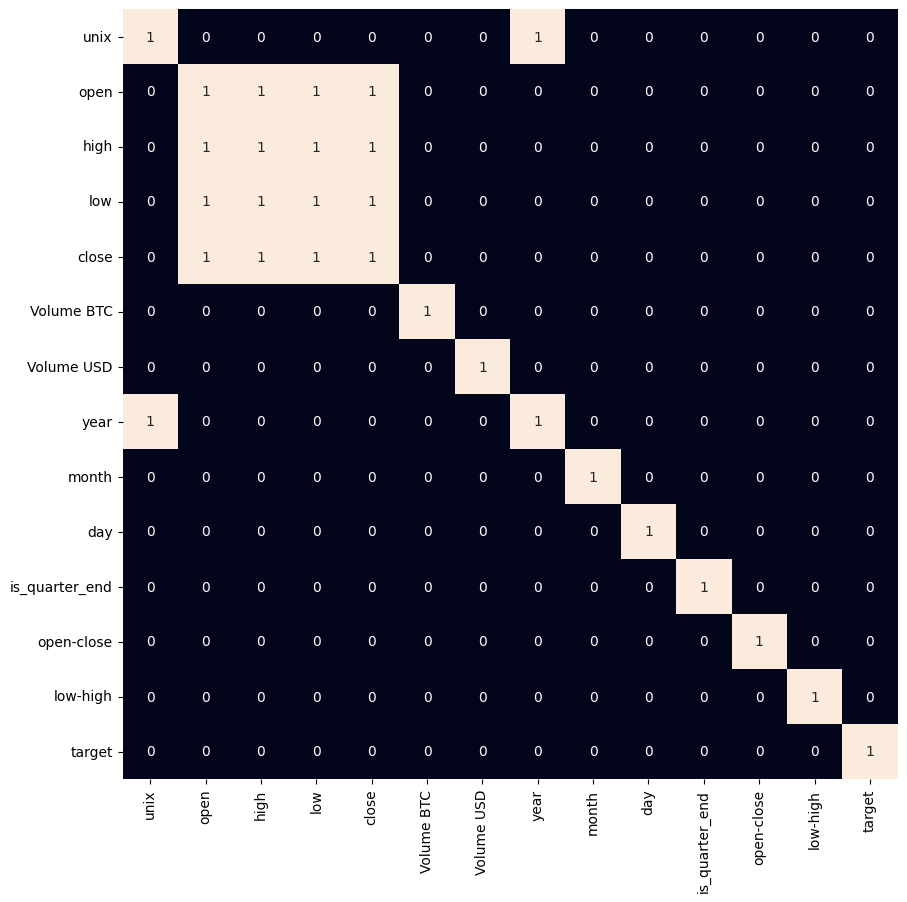

In [ ]:
plt.figure(figsize=(10, 10))


sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()


In [ ]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(2385, 3) (266, 3)


In [ ]:
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
 models[i].fit(X_train, Y_train)

 print(f'{models[i]} : ')
 print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
 print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
 print()


LogisticRegression() : 
Training Accuracy :  0.995851899873738
Validation Accuracy :  0.993468877782826

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.9749599415684786
Validation Accuracy :  0.9617787369377554

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Ac

In [ ]:
from sklearn import metrics



In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


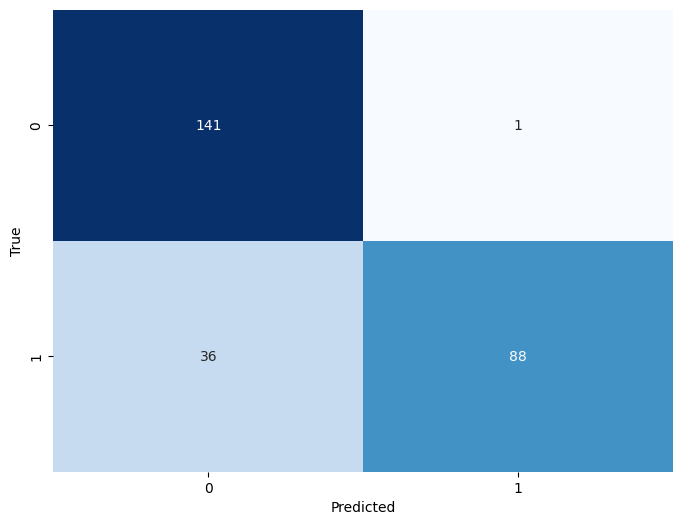

In [ ]:
y_pred = models[0].predict(X_valid)
cm = confusion_matrix(Y_valid, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()